In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm # to indicate the time required to complete the execution of the code
import warnings
warnings.filterwarnings('ignore')


In [3]:
train_path = "DATASET\DATASET\TEST"
test_path = "DATASET\DATASET\TEST"

activation -- for non leararity
dropout - 

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, MaxPooling2D, BatchNormalization, Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob 

In [6]:
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data,'label':y_data})

100%|██████████| 1112/1112 [00:27<00:00, 40.86it/s]


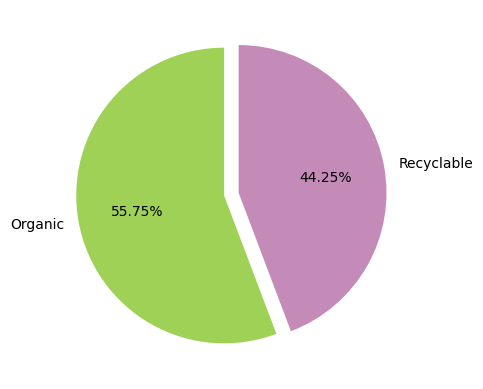

In [7]:
colors = ["#a0d157","#c48bb8"]
plt.pie(data.label.value_counts(),labels=['Organic', 'Recyclable'],autopct = '%0.2f%%', colors= colors , startangle=90, explode=[0.05,0.05])
plt.show()

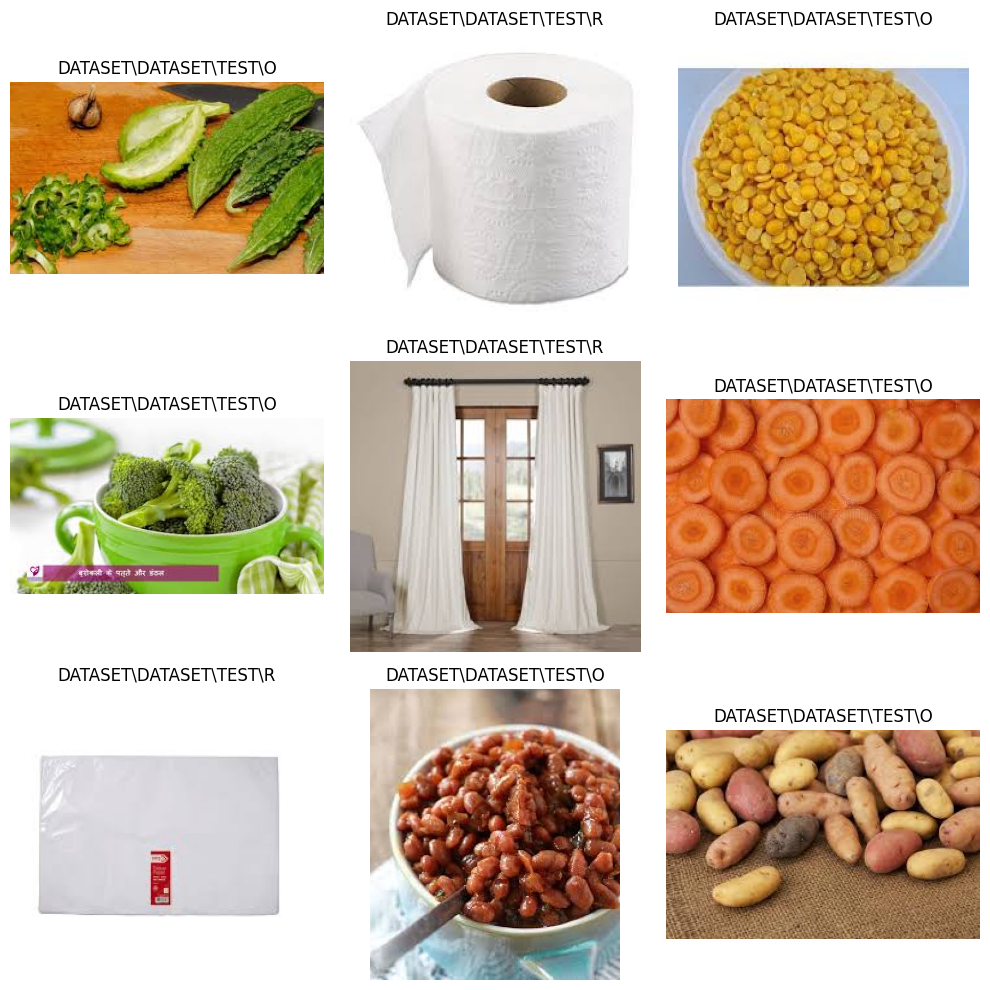

In [10]:
import random

# Function to display random images with their labels
def display_random_images(data, num_images=9):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        idx = random.randint(0, len(data) - 1)
        img = data.iloc[idx]['image']
        label = data.iloc[idx]['label']
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display random images
display_random_images(data)

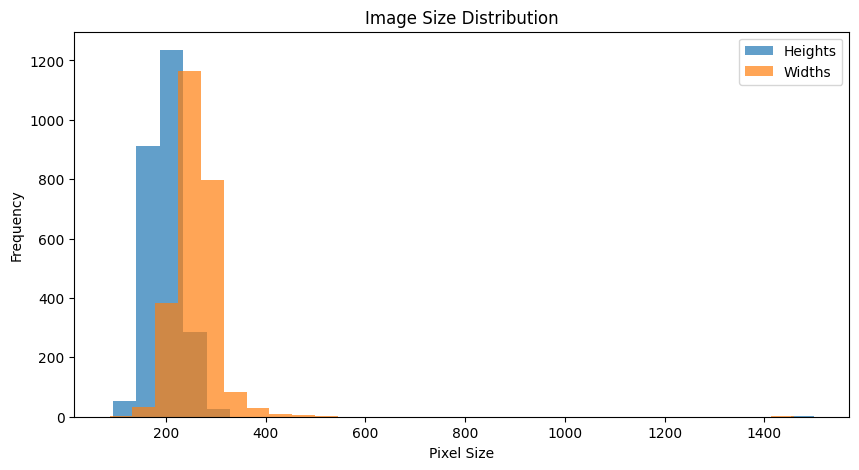

In [11]:
img_shapes = [img.shape[:2] for img in x_data]  # Extract height and width
heights, widths = zip(*img_shapes)

plt.figure(figsize=(10, 5))
plt.hist(heights, bins=30, alpha=0.7, label="Heights")
plt.hist(widths, bins=30, alpha=0.7, label="Widths")
plt.xlabel("Pixel Size")
plt.ylabel("Frequency")
plt.title("Image Size Distribution")
plt.legend()
plt.show()


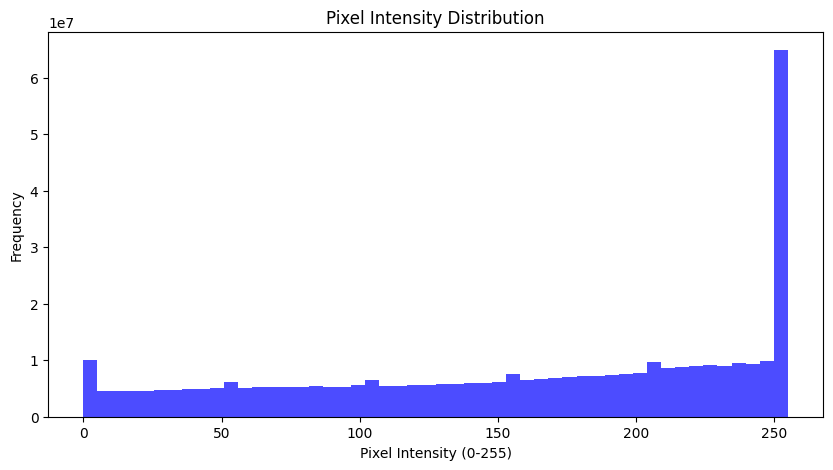

In [12]:
import numpy as np

# Flatten image data to analyze pixel values
pixels = np.concatenate([img.flatten() for img in x_data])

plt.figure(figsize=(10, 5))
plt.hist(pixels, bins=50, color='blue', alpha=0.7)
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Frequency")
plt.title("Pixel Intensity Distribution")
plt.show()
